#### Lower Triangular (Fully) Factorised Matrix

In [1]:
import numpy as np
import nexpy as nxp
import minterpy as mp

In [11]:
# SECTION : SUBSECTION
    # (markdown introduction)
    # METHODS : DESCRIPTION
    # PARAMETERS : DESCRIPTION
    # COMPUTATIONS : DESCRIPTION
    # OUTPUTS : DESCRIPTION

#### LTFBM : Access Newton to Lagrange Transformation

$\rightarrow$ This transformation is a Newton evaluation matrix. <br/>
$\rightarrow$ We refer to this transformation as the "Inverse Fast Newton Transformation" as a counterpart to the "Fast Newton Transformation", highlighting alsoa again its efficiency.

In [12]:
# Parameters: m, n and p

spatial_dimension = 4
poly_degree = 2
p_degree = 1

In [13]:
# Computations : Utilizing minterpy to construct the lower triangular factorised block matrix for the given parameters

tiling = nxp.core.triangular.IntegerList(nxp.utils.get_exponent_matrix_iterative(
    spatial_dimension = spatial_dimension,
    poly_degree = poly_degree,
    p_degree = p_degree,
    tilings_only = True))

mis = nxp.utils.get_exponent_matrix_iterative(
    spatial_dimension = spatial_dimension,
    poly_degree = poly_degree,
    p_degree = p_degree)

mi = mp.MultiIndexSet(mis)

grd = mp.Grid(mi)

exponents = mi.exponents
gen_points = grd.generating_points
unisolvent_nodes = grd.unisolvent_nodes
leaf_positions = grd.tree.split_positions[0]
leaf_sizes = grd.tree.subtree_sizes[0]

first_n2l_piece, leaf_factors, leaf_positions, leaf_sizes = mp.schemes.barycentric.precomp.compute_n2l_factorised(
    exponents, gen_points, unisolvent_nodes, leaf_positions, leaf_sizes)

ltfbm = nxp.core.triangular.LowerTriangularFactorisedBlockMatrix(
    first_piece = first_n2l_piece,
    node = leaf_factors,
    tiling = leaf_sizes,
)

entropy = tiling.entropy()
entropy_entry = entropy.entries[2]

first piece matrix:



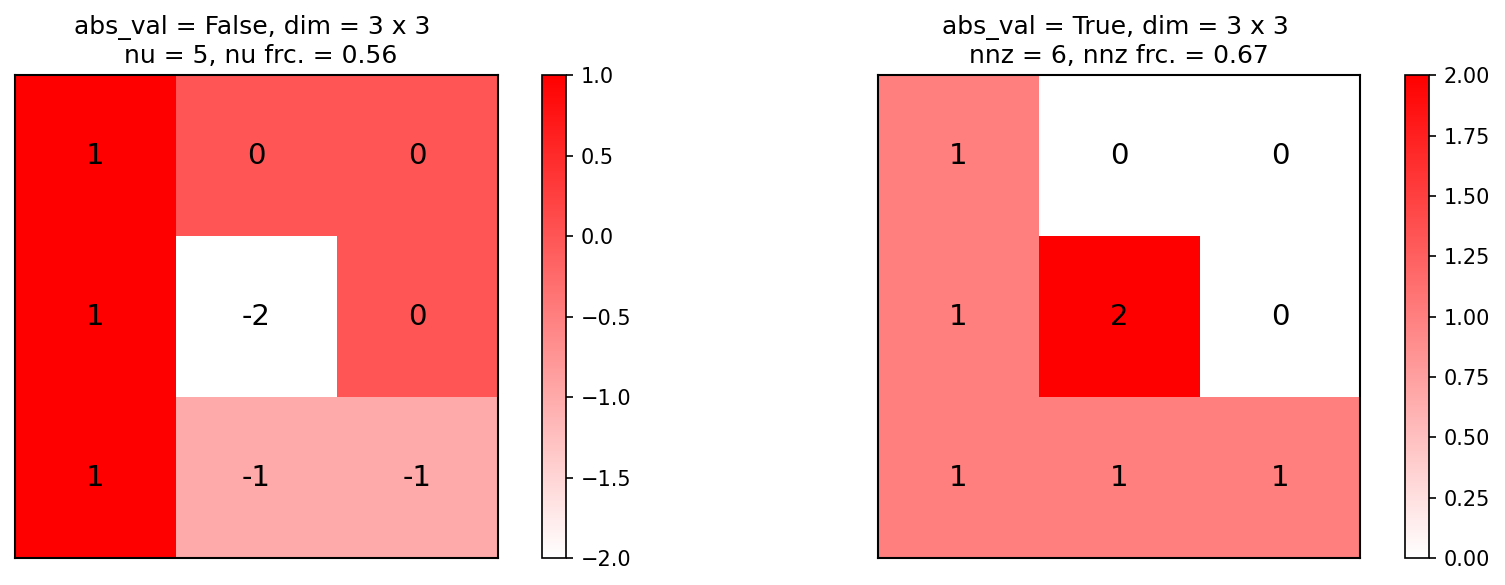

leaf factors matrix:



original matrix:



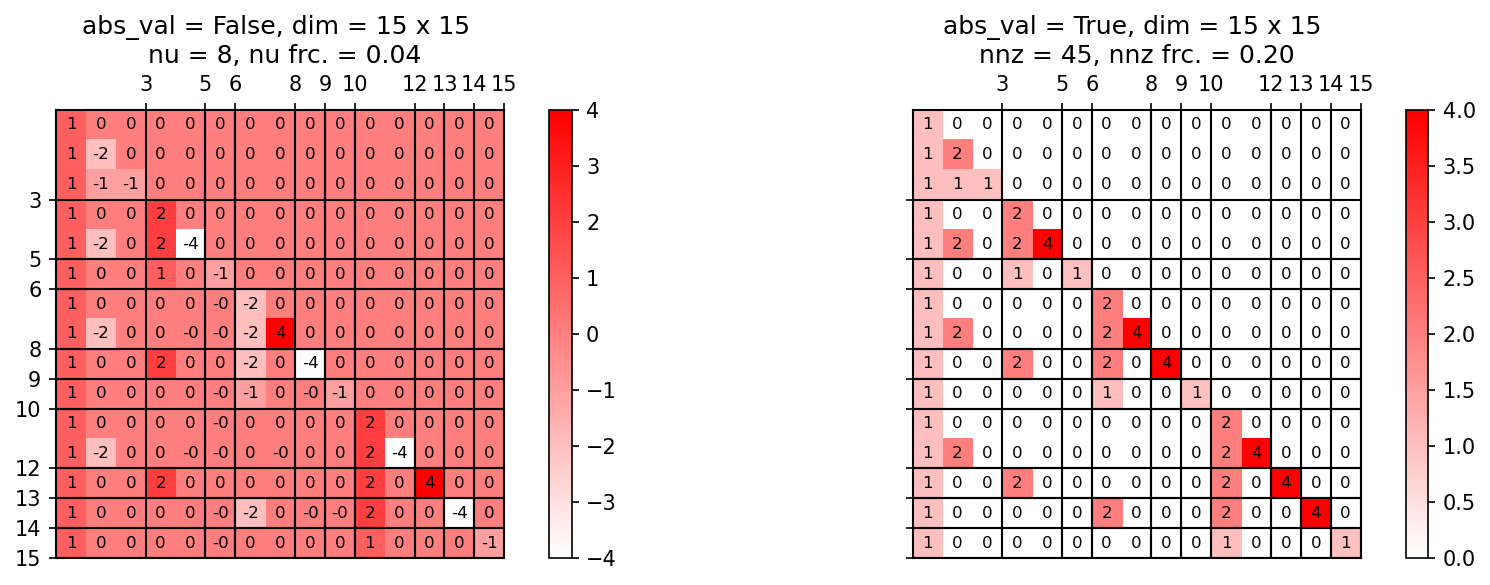

In [14]:
# Outputs : Visualisation of the lower triangular factorised block matrix in the current state

print(f'first piece matrix:\n')
nxp.visual.plot.matrix(
    first_n2l_piece, 
    [], 
    fontsize = 14, 
    display_values = True, 
    dark_mode = False)

print(f'leaf factors matrix:\n')
nxp.visual.plot.matrix(
    leaf_factors, 
    tiling.cumsum().entries[0:entropy_entry], 
    display_values = True, 
    dark_mode = False)

print(f'original matrix:\n')
nxp.visual.plot.matrix(
    ltfbm.reconstruct().reconstruct(), 
    tiling.cumsum().entries, 
    display_values = True, 
    dark_mode = False)

#### LTFBM : Properties

In [15]:
# Outputs : Some properties of the ltfbm object

print(f'first piece entries:\n {ltfbm.root.first_piece.entries},\n')
print(f'leaf factors entries:\n {ltfbm.root.leaf_factors.entries},\n')
print(f'tiling: {ltfbm.tiling}, \n')
print(f'depth of factorisation: {str(ltfbm.depth)}.')

first piece entries:
 [ 1.  1. -2.  1. -1. -1.],

leaf factors entries:
 [ 1.  1.  2.  1.  1. -1.  1.  0. -0. -2.  1.  2.  0. -2. -4.  1.  0. -0.
 -1. -0. -1.  1.  0. -0.  0.  0.  0.  2.  1.  2.  0.  0.  0.  0.  2.  4.
  1.  0. -0. -2. -0. -0.  2.  0. -4.  1.  0. -0.  0.  0.  0.  1.  0.  0.
 -1.],

tiling: L = (3, 2, 1, 2, 1, 1, 2, 1, 1, 1), 

depth of factorisation: 1.


#### LTFFBM

$\rightarrow$ Given the $L$-factorisation of $A$ we fully factorise $A$ such that we then have a $L$-factorisation chain of maximal depth.

In [16]:
# Computations : Factorising the ltfbm object

ltfbm.factorise(protocol = True) # no max_depth given means it tries to fully factorise


                    --------------- TOTAL [0] ---------------

                    mod_positions:[0, 3, 5, 6, 8, 9],

                    leaf_factors:
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0. -0. -2.  0.  0.  0.  0.  0.  0.]
 [ 1.  2.  0. -2. -4.  0.  0.  0.  0.  0.]
 [ 1.  0. -0. -1. -0. -1.  0.  0.  0.  0.]
 [ 1.  0. -0.  0.  0.  0.  2.  0.  0.  0.]
 [ 1.  2.  0.  0.  0.  0.  2.  4.  0.  0.]
 [ 1.  0. -0. -2. -0. -0.  2.  0. -4.  0.]
 [ 1.  0. -0.  0.  0.  0.  1.  0.  0. -1.]],

                    item evaluations:

[0,0] = 1.0

[3,0] = 1.0

[3,3] = -2.0

[5,0] = 1.0

[5,3] = -1.0

[5,5] = -0.9999999999999999

[6,0] = 1.0

[6,3] = 0.0

[6,5] = 0.0

[6,6] = 2.0

[8,0] = 1.0

[8,3] = -2.0

[8,5] = -0.0

[8,6] = 2.0

[8,8] = -4.0

[9,0] = 1.0

[9,3] = 0.0

[9,5] = 0.0

[9,6] = 1.0

[9,8] = 0.0

[9,9] = -0.9999999999999999



leaf_factors_next:
[[ 1.  0.  0.  0.  0.  0.]
 [ 1. -2.  0.  0.

(True, 2)

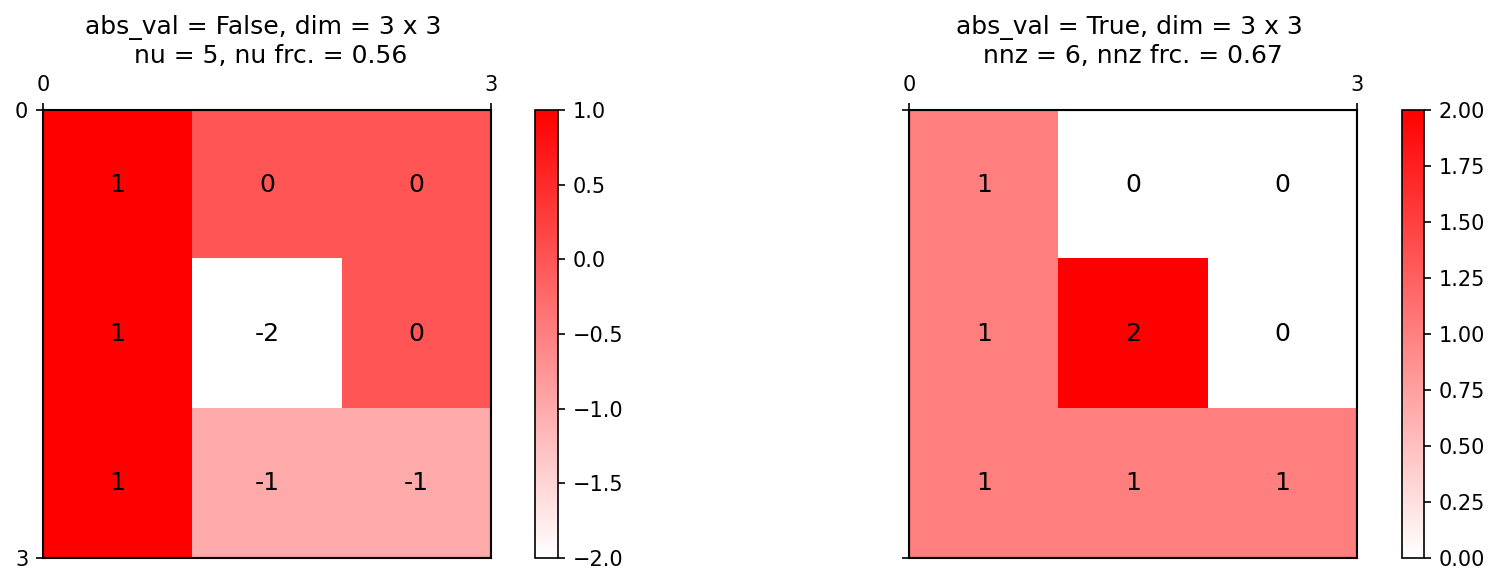

In [17]:
# Outputs : Visualisation of the lower triangular fully factorised block-matrix


for i in range(2):
    lmat = ltfbm.tree[i].reconstruct()
    nxp.visual.plot.matrix(
        lmat,
        np.array([0, len(lmat)]),
        fontsize=12,
        dark_mode = False)

In [18]:
# Outputs : Does the rest of the tree differ ...?

eps = 0.0

N = len(ltfbm.tree)

last_mat = None
cur_mat = None

for lmat in ltfbm.tree:
    
    cur_mat = lmat.reconstruct()
    
    if not last_mat is None:
        
        eps += np.linalg.norm(cur_mat-last_mat)
    
    last_mat = cur_mat
    
eps /= N

if eps == 0.0:
    print("No, the tree consists of " + str(N) + " times the same matrix.")

else:
    print("Yes, there must be at least one different matrix.")

Yes, there must be at least one different matrix.


In [19]:
# For the specific choice of unisolvent nodes from Michael et. al., without varying the signs of the nodes, the whole chain of factorisation
# consists of the same matrix. The current official version of minterpy does use alternating signs for the unisolvent nodes.
# This is avoided in the fast Newton polynomial class of nexpy and further optimises the storage consumption of the format.